# **DIAMOND CHALLENGE PT1 **

LOADING AND CLEANING THE DATA


In [27]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Loading data
df = pd.read_csv ("/content/wholesale_diamonds_2012_2023.csv")
df.head(10)

,index,carat,cut,color,clarity,depth,table,cost (dollars),length (mm),width (mm),height (mm),year
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2012
1,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2012
2,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2012
3,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2012
4,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2012
5,5,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,2012
6,6,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,2012
7,7,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73,2012
8,8,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46,2012
9,9,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33,2012


In [29]:
df.describe()

,index,carat,depth,table,cost (dollars),length (mm),width (mm),height (mm),year
count,407280.000000,405232.000000,407280.000000,407280.000000,407280.000000,407280.000000,407280.000000,407280.000000,407280.000000
mean,16969.500000,0.797742,61.747793,57.457113,4372.968506,5.730165,5.732369,3.538519,2017.500000
std,9797.646092,0.474774,1.434209,2.239837,4503.620949,1.122960,1.114266,0.712168,3.452057
min,0.000000,0.200000,43.000000,43.000000,-998.000000,0.000000,0.000000,0.000000,2012.000000
25%,8484.750000,0.400000,61.000000,56.000000,1043.000000,4.710000,4.720000,2.910000,2014.750000
50%,16969.500000,0.700000,61.800000,57.000000,2655.000000,5.690000,5.710000,3.520000,2017.500000
75%,25454.250000,1.040000,62.500000,59.000000,5960.000000,6.530000,6.530000,4.030000,2020.250000
max,33939.000000,4.130000,79.000000,95.000000,26930.000000,10.140000,10.100000,31.800000,2023.000000


In [30]:
#Data types of every column
df.dtypes

index               int64
carat             float64
cut                object
color              object
clarity            object
depth             float64
table             float64
cost (dollars)      int64
length (mm)       float64
width (mm)        float64
height (mm)       float64
year                int64
dtype: object

In [31]:
# Finding Missing values in every column
MissingVals = df.isna().sum()
MissingVals

index                0
carat             2048
cut                  0
color                0
clarity              0
depth                0
table                0
cost (dollars)       0
length (mm)          0
width (mm)           0
height (mm)          0
year                 0
dtype: int64

In [32]:
# Finding the index for each NaN values of carats:
NaNCarats = df[df['carat'].isna()]
NaNCarats

,index,carat,cut,color,clarity,depth,table,cost (dollars),length (mm),width (mm),height (mm),year
348,348,NaN,Very Good,J,SI1,63.4,54.0,2834,6.17,6.14,3.90,2012
383,383,NaN,Ideal,D,SI1,61.4,57.0,2841,5.76,5.80,3.55,2012
404,404,NaN,Very Good,H,SI1,61.2,57.0,2847,6.10,6.12,3.74,2012
649,649,NaN,Ideal,D,SI1,61.3,55.0,558,4.41,4.46,2.72,2012
1023,1023,NaN,Ideal,E,SI1,60.3,55.0,3012,5.85,5.89,3.54,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
406691,33351,NaN,Ideal,F,SI1,62.3,57.0,3128,5.68,5.64,3.53,2023
406869,33529,NaN,Ideal,D,SI1,61.7,56.0,693,4.31,4.35,2.67,2023
406925,33585,NaN,Ideal,F,SI1,62.6,55.0,3429,5.67,5.68,3.55,2023
406955,33615,NaN,Premium,E,VS2,60.9,59.0,3349,5.68,5.71,3.47,2023


In [33]:
# Creating list with all indices with missing carat values
NaNCaratsIndices = NaNCarats['index'].tolist()
print(NaNCaratsIndices)


[348, 383, 404, 649, 1023, 1132, 1161, 1169, 1199, 1309, 1754, 1797, 2383, 2501, 2618, 2633, 2704, 2851, 3057, 3547, 3744, 3950, 4413, 4845, 5497, 5940, 6178, 6299, 6337, 6416, 6647, 6659, 7230, 7533, 7907, 8177, 8219, 8526, 8663, 9129, 9604, 9692, 10613, 10768, 11234, 11305, 11465, 12046, 12193, 12461, 12589, 12775, 12834, 12927, 12958, 13237, 13714, 14433, 14507, 14534, 14753, 14930, 14949, 15059, 15348, 15389, 15496, 15552, 15598, 15678, 16178, 16428, 16511, 16526, 16569, 16609, 16618, 16899, 17044, 17102, 17118, 17424, 17661, 17666, 17679, 17710, 17738, 18429, 18901, 19002, 19077, 19085, 19239, 19404, 19645, 19766, 20244, 20277, 20421, 20575, 20627, 20783, 21054, 21123, 21501, 21764, 22262, 22322, 22378, 22807, 23072, 23242, 23319, 23350, 23443, 23722, 23854, 23857, 23918, 24366, 24970, 25147, 25181, 25353, 25395, 25777, 25898, 26023, 26110, 26341, 26387, 26435, 26449, 26467, 26581, 26742, 27208, 27538, 28148, 28669, 28871, 28912, 29131, 29215, 29346, 29616, 29749, 29947, 30014, 30

In [37]:
# Replacing NaN values with its correct value

for index in NaNCaratsIndices:

    NonNaN = df[(df['index'] == index) & df['carat'].notna()]['carat']

    if NonNaN.nunique() == 1:
        NewVal = NonNaN.iloc[0]
        df.loc[(df['index'] == index) & df['carat'].isna(), 'carat'] = NewVal
    else:
        print(f"Index {index} has an error")

In [36]:
# Checking for Missing Values
MissingValues = df.isna().sum()
print(MissingValues)

index             0
carat             0
cut               0
color             0
clarity           0
depth             0
table             0
cost (dollars)    0
length (mm)       0
width (mm)        0
height (mm)       0
year              0
dtype: int64


In [42]:
# Now I will focus on encoding the categorical data

# Unique values for 'cut'
CutVals = df['cut'].unique()
print(CutVals)

# Unique values for 'color'
ColorVals = df['color'].unique()
print(ColorVals)

# Unique values for 'clarity'
ClarityVals = df['clarity'].unique()
print(ClarityVals)

['Ideal' 'Good' 'Premium' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'VS1' 'VS2' 'VVS2' 'VVS1' 'SI1' 'I1' 'IF']


In [43]:
# Mapping the values based on their rank

ColorMapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
df['color'] = df['color'].map(ColorMapping)

CutMapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
df['cut'] = df['cut'].map(CutMapping)

ClarityMapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
df['clarity'] = df['clarity'].map(ClarityMapping)

df

,index,carat,cut,color,clarity,depth,table,cost (dollars),length (mm),width (mm),height (mm),year
0,0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,2012
1,1,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31,2012
2,2,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,2012
3,3,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,2012
4,4,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
407275,33935,0.72,5,7,3,60.8,57.0,3394,5.75,5.76,3.50,2023
407276,33936,0.72,2,7,3,63.1,55.0,3256,5.69,5.75,3.61,2023
407277,33937,0.70,3,7,3,62.8,60.0,3569,5.66,5.68,3.56,2023
407278,33938,0.86,4,3,2,61.0,58.0,4022,6.15,6.12,3.74,2023


In [50]:
# Time to check for negative values

for column in ['carat', 'cost (dollars)', 'length (mm)', 'width (mm)', 'height (mm)', 'depth', 'table']:
    NegativeVals = df[df[column] < 0]
    if not NegativeVals.empty:
        print(f"Negative values found in '{column}':")
        print(NegativeVals)


Negative values found in 'cost (dollars)':
        index  carat  cut  color  clarity  depth  table  cost (dollars)  \
337       337   0.91    3      2        2   62.8   61.0            -404   
426       426   0.97    5      5        1   60.7   56.0            -537   
896       896   0.81    3      6        3   59.5   60.0            -154   
1049     1049   0.93    4      4        2   61.4   56.0            -284   
1208     1208   0.80    3      5        3   63.5   58.0            -902   
...       ...    ...  ...    ...      ...    ...    ...             ...   
405806  32466   0.26    5      4        6   62.3   56.0            -515   
405830  32490   0.56    5      4        8   62.0   56.0            -634   
406633  33293   0.58    5      7        4   61.5   56.0            -982   
406820  33480   0.71    2      7        3   64.0   56.0            -178   
406822  33482   0.77    2      5        3   63.2   57.0            -806   

        length (mm)  width (mm)  height (mm)  year  
337

In [51]:
# Where are these negative values
NegCost = df[df['cost (dollars)'] <= 0]
indices = NegCost['index'].unique().tolist()
print(indices)
print(len(indices))

[337, 426, 896, 1049, 1208, 1330, 1669, 1798, 2037, 2040, 2611, 2656, 2718, 3380, 3729, 3812, 4286, 4363, 4406, 4531, 4634, 4640, 5030, 5045, 5228, 5343, 5712, 6104, 6655, 6889, 7007, 7008, 7085, 7099, 7161, 7373, 7401, 7992, 8058, 8252, 8679, 9059, 9289, 9708, 9729, 10117, 10259, 10747, 10941, 11287, 11327, 11350, 11488, 11684, 11981, 12028, 12286, 12458, 12607, 12649, 12943, 12953, 13174, 13262, 13780, 13839, 14004, 14270, 14424, 14502, 14797, 15177, 15213, 15592, 15686, 15834, 16305, 16506, 16744, 17114, 17315, 17356, 17714, 17747, 17842, 17993, 18038, 18208, 18372, 18390, 18414, 18789, 18912, 19156, 19202, 19447, 19790, 19794, 19898, 20000, 20002, 20347, 20357, 20437, 20997, 21250, 21893, 21938, 22038, 22236, 22448, 22516, 22687, 22842, 22850, 23527, 23862, 24088, 24099, 24483, 24690, 24692, 24776, 24871, 25138, 25529, 25609, 25815, 26032, 26170, 26603, 27727, 28012, 28252, 28799, 28968, 29089, 29106, 29260, 29339, 29385, 29498, 29777, 29917, 30016, 30583, 30797, 30808, 30941, 3112

In [57]:
df_sorted = df.sort_values(by=['index', 'year']).copy()

def interpolate_and_update(df):
    # Sorting the DataFrame by 'index' and 'year'
    df_sorted = df.sort_values(by=['index', 'year'])

    # Interpolating the 'cost (dollars)' column within each group
    df_sorted['cost (dollars)'] = df_sorted.groupby('index')['cost (dollars)'].transform(lambda x: x.interpolate(method='linear').ffill().bfill())

    # Updating the original DataFrame with the interpolated values
    df.update(df_sorted)

# Call the function to apply the interpolation and update the original DataFrame
interpolate_and_update(df)

In [56]:
NegativeCosts = df[df['cost (dollars)'] <= 0]
print(NegativeCosts)

Empty DataFrame
Columns: [index, carat, cut, color, clarity, depth, table, cost (dollars), length (mm), width (mm), height (mm), year]
Index: []


In [58]:
# Let's look at the outliers: where length, width, and height are equal to zero
ZerosDims = df[(df['length (mm)'] == 0) | (df['width (mm)'] == 0) | (df['height (mm)'] == 0)]

ZerosIndices = ZerosDims['index'].unique().tolist()
print(ZerosIndices)

[1382, 1447, 3415, 6362, 6995, 7476, 15267, 16377, 16993, 31131, 31132]


In [59]:
# Let's remove these values
df = df[(df['length (mm)'] != 0) & (df['width (mm)'] != 0) & (df['height (mm)'] != 0)]
df

,index,carat,cut,color,clarity,depth,table,cost (dollars),length (mm),width (mm),height (mm),year
0,0,0.23,5,6,2,61.5,55.0,326.0,3.95,3.98,2.43,2012
1,1,0.23,2,6,5,56.9,65.0,327.0,4.05,4.07,2.31,2012
2,2,0.29,4,2,4,62.4,58.0,334.0,4.20,4.23,2.63,2012
3,3,0.31,2,1,2,63.3,58.0,335.0,4.34,4.35,2.75,2012
4,4,0.24,3,1,6,62.8,57.0,336.0,3.94,3.96,2.48,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
407275,33935,0.72,5,7,3,60.8,57.0,3394.0,5.75,5.76,3.50,2023
407276,33936,0.72,2,7,3,63.1,55.0,3256.0,5.69,5.75,3.61,2023
407277,33937,0.70,3,7,3,62.8,60.0,3569.0,5.66,5.68,3.56,2023
407278,33938,0.86,4,3,2,61.0,58.0,4022.0,6.15,6.12,3.74,2023


In [60]:
df.describe()

,index,carat,cut,color,clarity,depth,table,cost (dollars),length (mm),width (mm),height (mm),year
count,407148.000000,407148.000000,407148.000000,407148.000000,407148.000000,407148.000000,407148.000000,407148.000000,407148.000000,407148.000000,407148.000000,407148.000000
mean,16970.934982,0.797579,3.904978,4.399511,4.048719,61.747906,57.456760,4396.504748,5.730482,5.732504,3.539666,2017.500000
std,9797.167337,0.474664,1.115190,1.701742,1.649169,1.433913,2.239754,4500.410831,1.121065,1.112799,0.709427,3.452057
min,0.000000,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,304.000000,3.730000,3.680000,1.070000,2012.000000
25%,8488.000000,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,1053.000000,4.710000,4.720000,2.910000,2014.750000
50%,16972.000000,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2677.000000,5.690000,5.710000,3.520000,2017.500000
75%,25455.000000,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5982.000000,6.530000,6.530000,4.030000,2020.250000
max,33939.000000,4.130000,5.000000,7.000000,8.000000,79.000000,95.000000,26930.000000,10.140000,10.100000,31.800000,2023.000000


In [61]:
# Saving the Data
df.to_csv('CleanedData.csv', index=False)

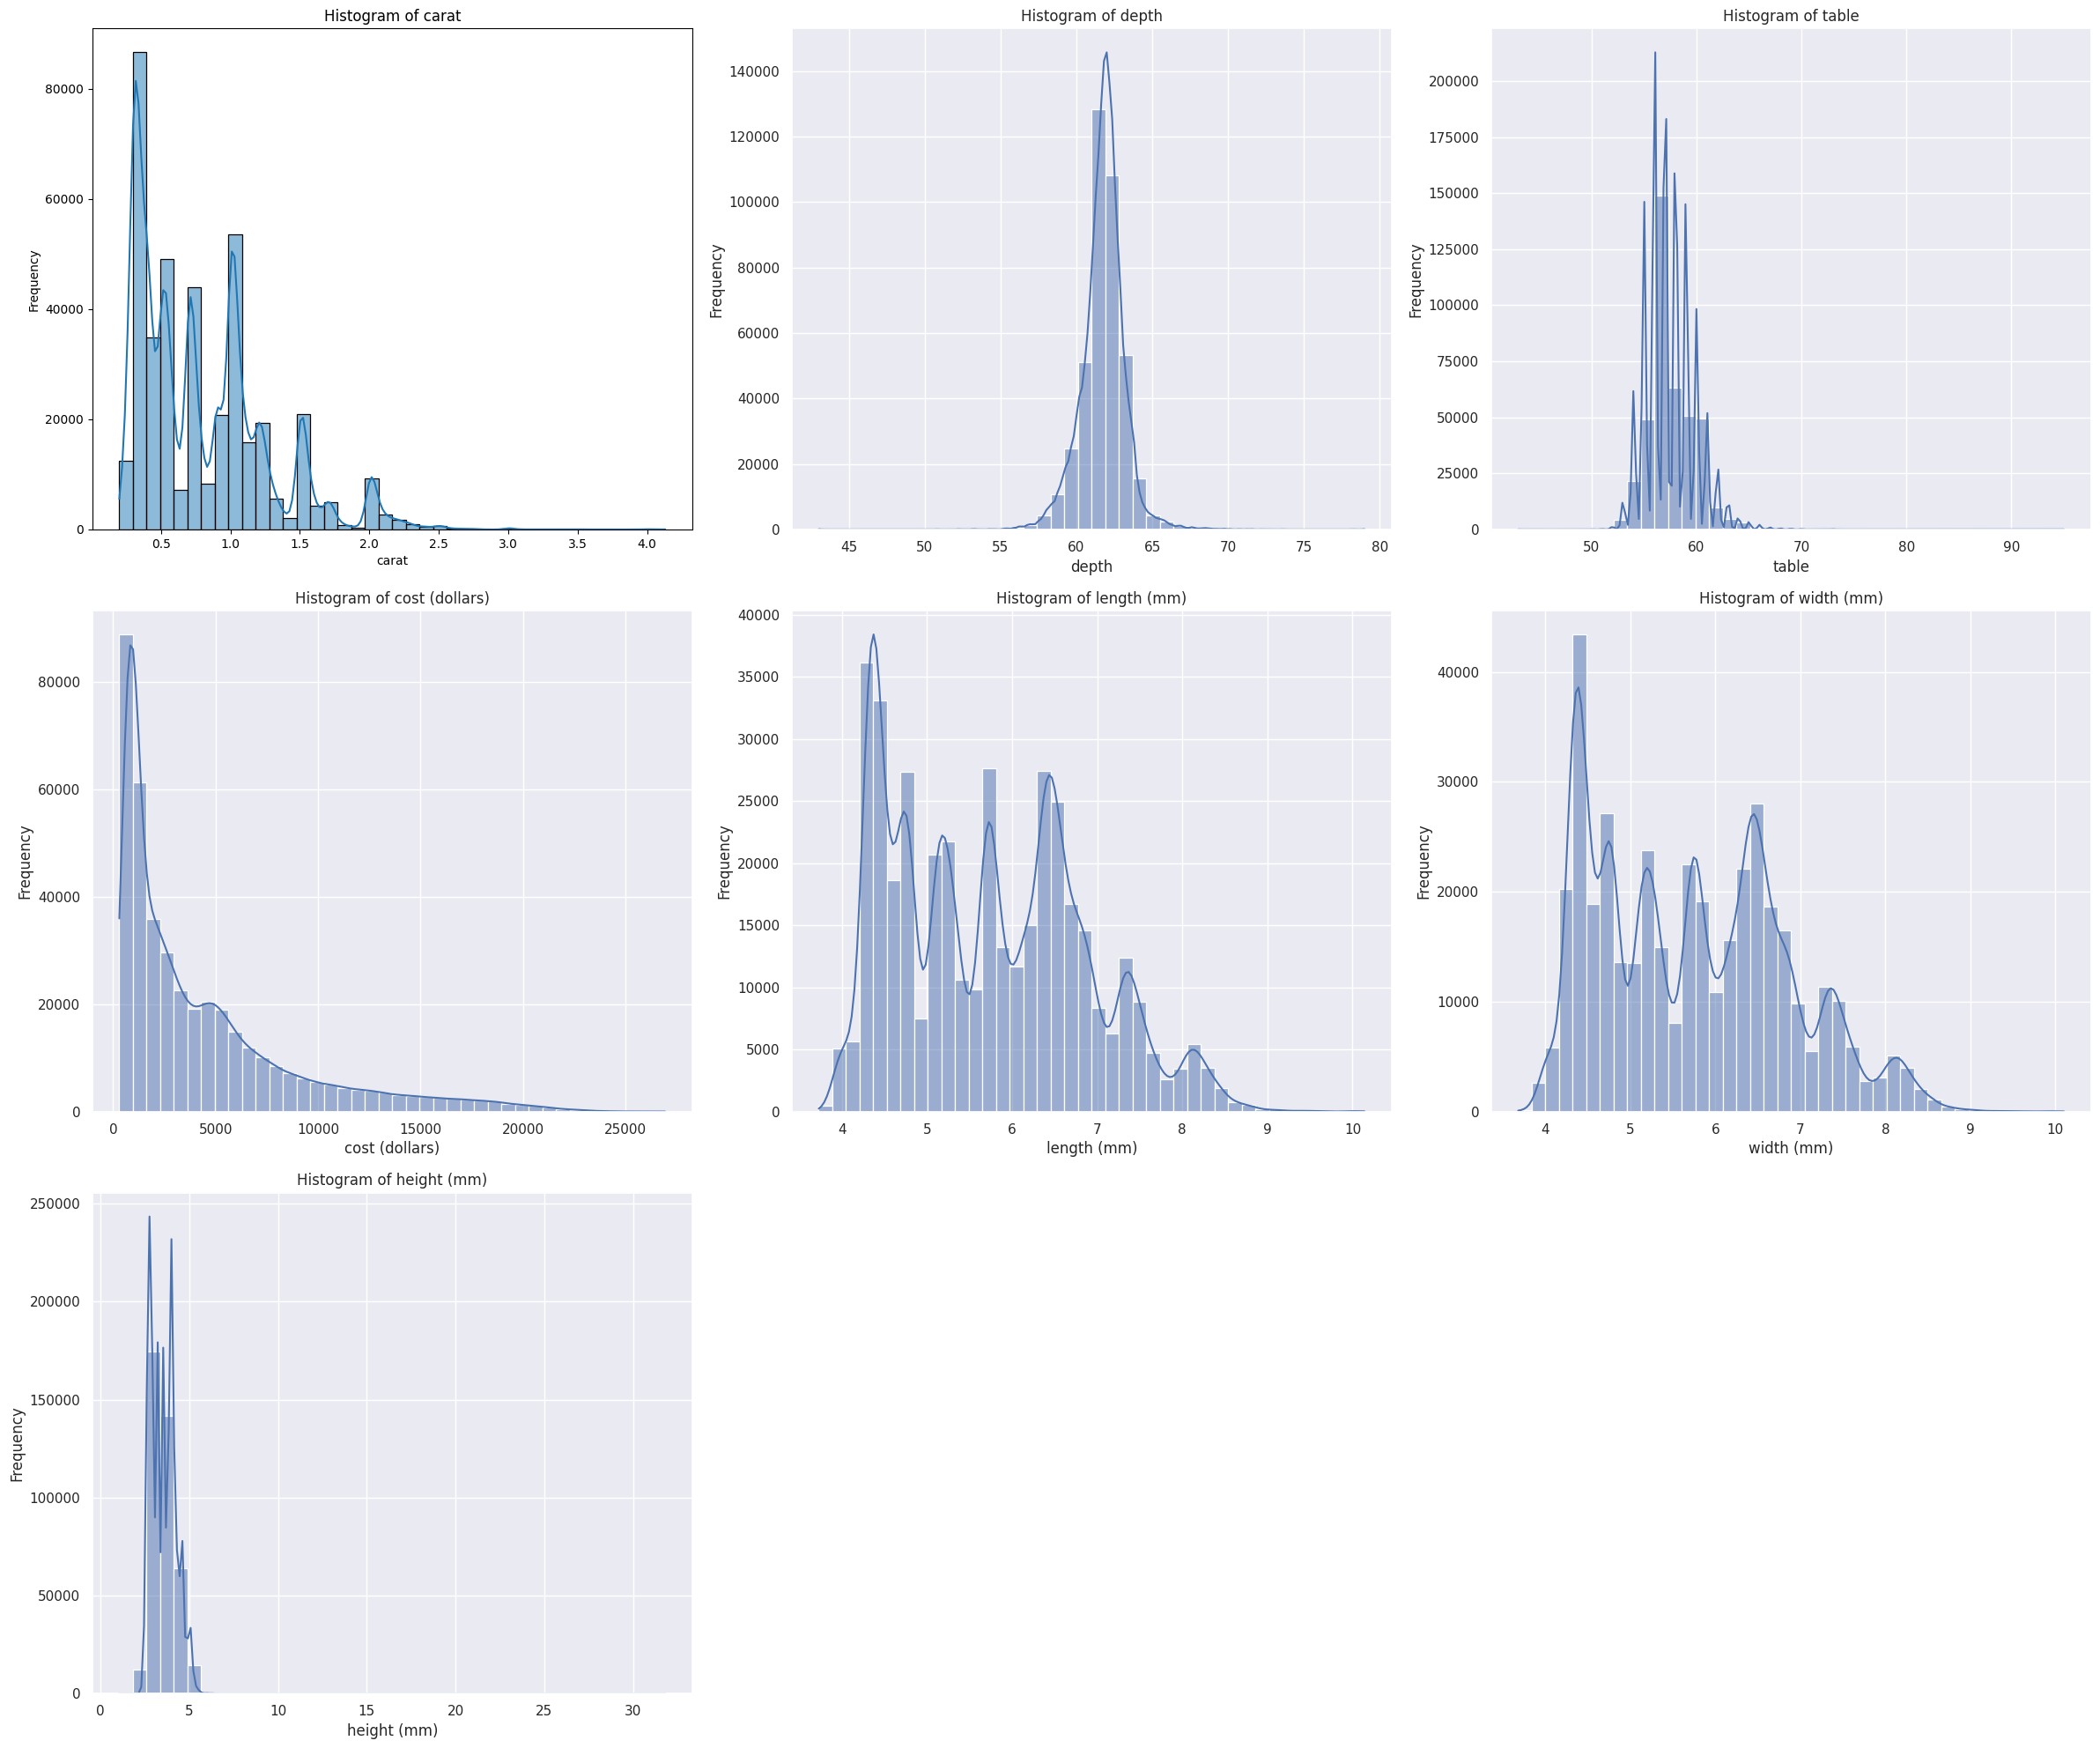

In [62]:
# Hisogram of various attributes
attributes = ['carat', 'depth', 'table', 'cost (dollars)', 'length (mm)', 'width (mm)', 'height (mm)']
plt.figure(figsize=(24, 20))

for i, attribute in enumerate(attributes, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(df[attribute], kde=True, bins=40)
    sns.set()
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

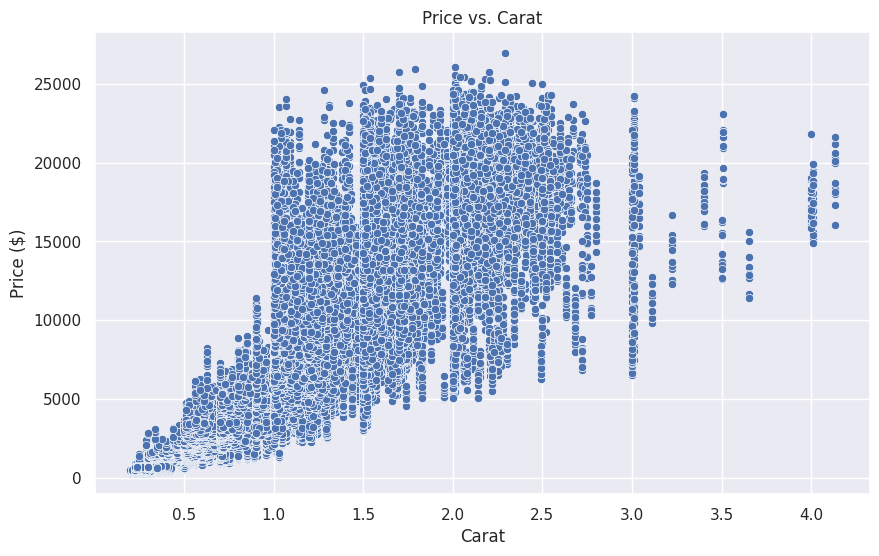

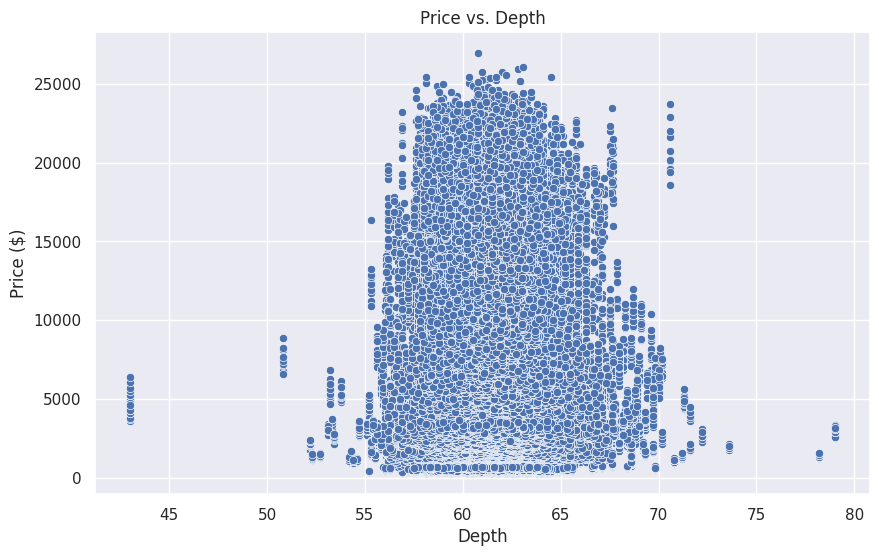

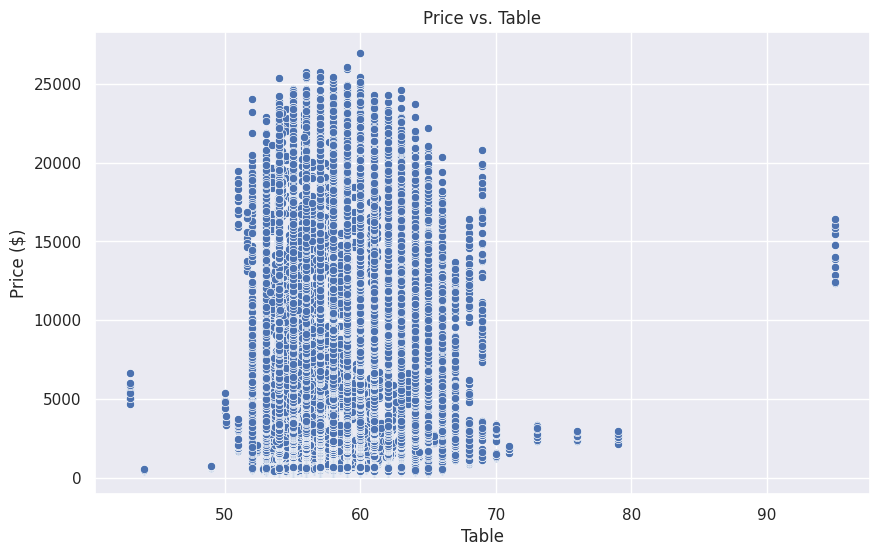

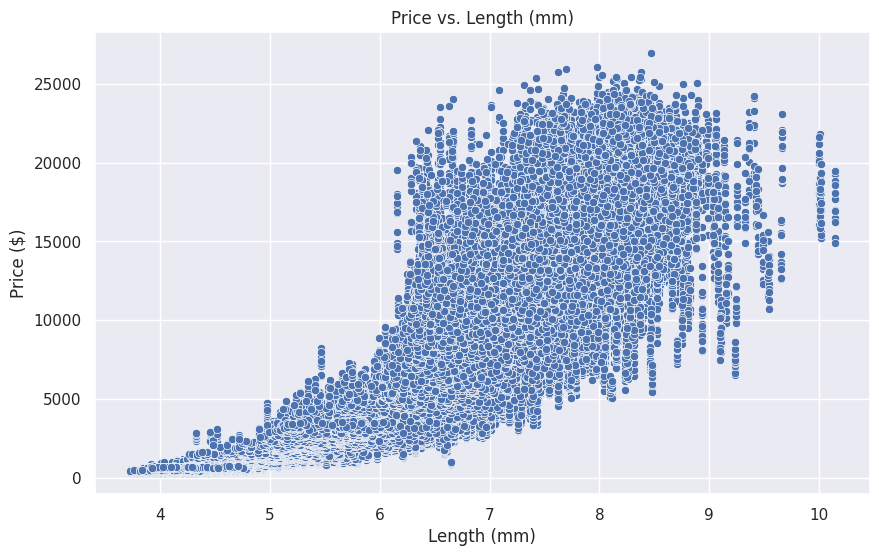

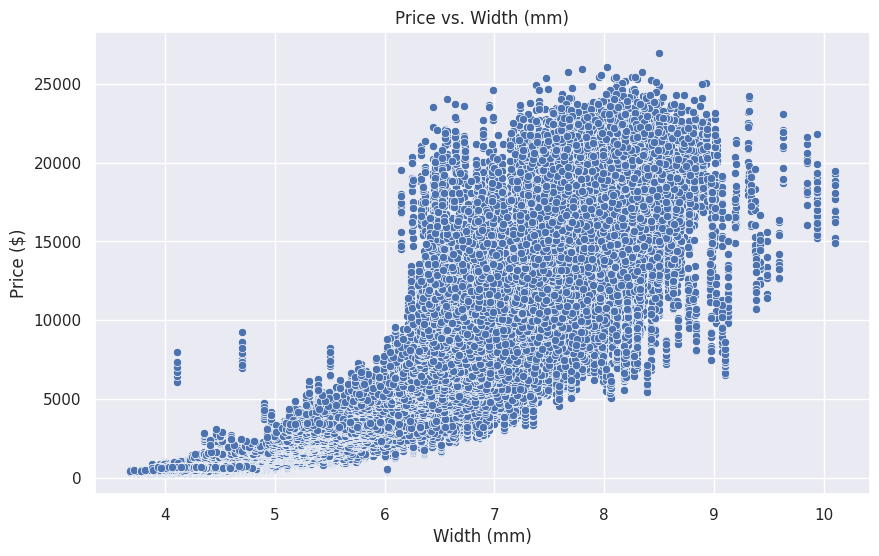

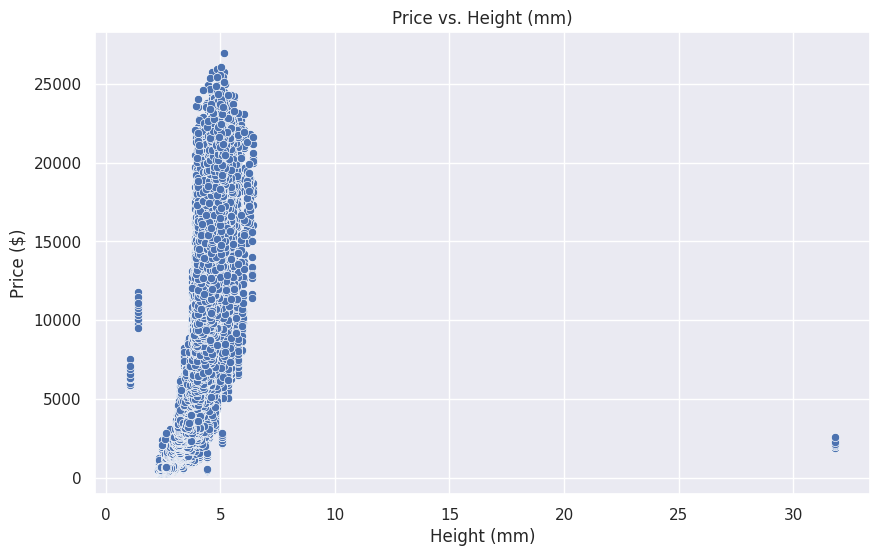

In [63]:
continuous_attributes = ['carat', 'depth', 'table', 'length (mm)', 'width (mm)', 'height (mm)']

for attribute in continuous_attributes:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[attribute], y=df['cost (dollars)'])
    plt.title(f'Price vs. {attribute.capitalize()}')
    plt.xlabel(attribute.capitalize())
    plt.ylabel('Price ($)')
    plt.show()

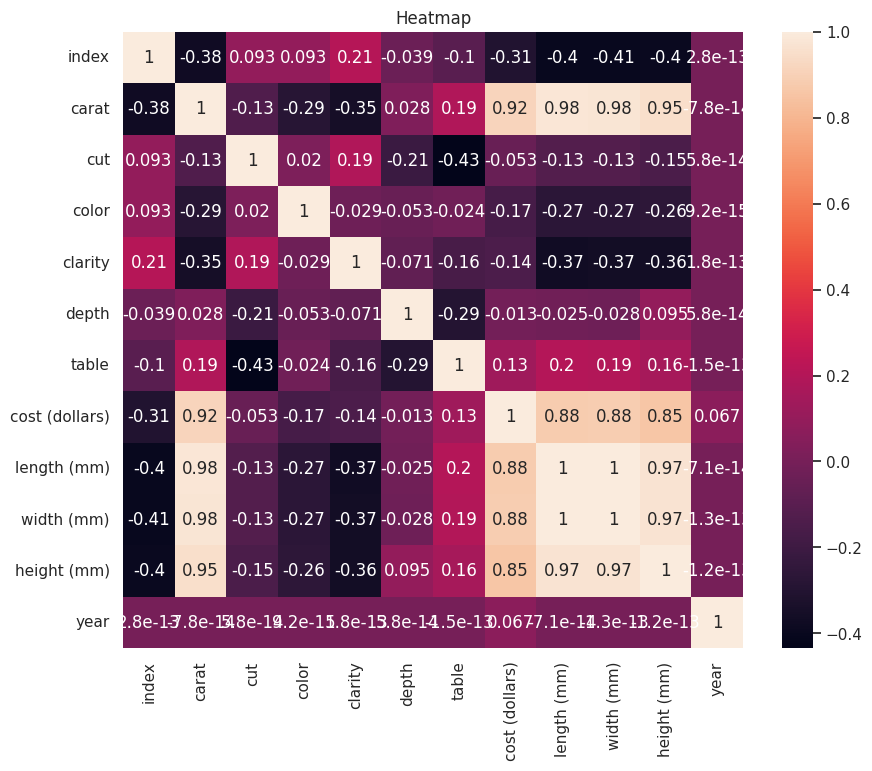

In [67]:
#Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Heatmap')
plt.show()

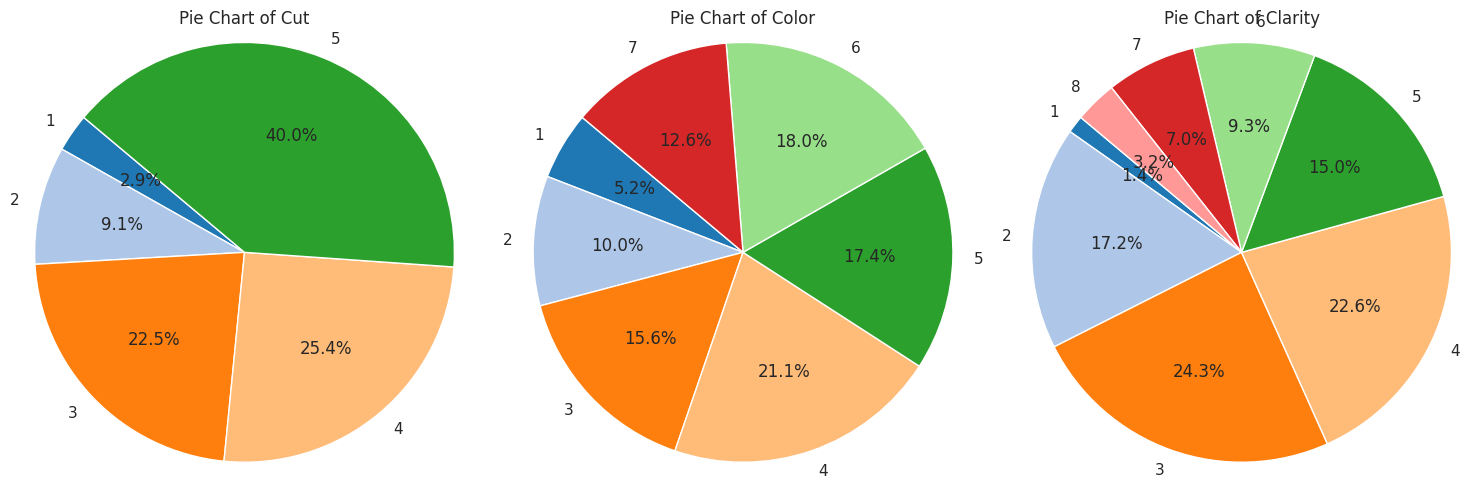

In [66]:
# Distribution of attributes
attributes = ['cut', 'color', 'clarity']

plt.figure(figsize=(15, 5))

for i, attribute in enumerate(attributes, start=1):
    plt.subplot(1, 3, i)
    counts = df[attribute].value_counts().sort_index()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
    plt.title(f'Pie Chart of {attribute.capitalize()}')
    plt.axis('equal')

plt.tight_layout()
plt.show()
